In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [3]:
df = pd.read_csv(r'C:\Users\syeda\OneDrive\Desktop\bharath internship\seattle-weather.csv')


In [4]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


# Data Analysis 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [6]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [37]:
df.head(2)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2


In [38]:
df.index

RangeIndex(start=0, stop=1461, step=1)

In [39]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [40]:
df.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                   int32
dtype: object

In [41]:
df['weather'].unique()

array([0, 2, 4, 3, 1])

In [42]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [43]:
df.count()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

# Preprocessing the Dataset

In [7]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [44]:
df['weather'].value_counts()

2    641
4    640
1    101
0     53
3     26
Name: weather, dtype: int64

In [10]:
df[df['temp_min'] == min(df.temp_min)]

,date,precipitation,temp_max,temp_min,wind,weather
706,2013-12-07,0.0,0.0,-7.1,3.1,sun


In [11]:
df[df['temp_max'] == min(df.temp_max)]

,date,precipitation,temp_max,temp_min,wind,weather
767,2014-02-06,0.0,-1.6,-6.0,4.5,sun


In [47]:
df.notnull().sum()

date             1461
precipitation    1461
temp_max         1461
temp_min         1461
wind             1461
weather          1461
dtype: int64

In [49]:
df.precipitation.mean()

3.02943189596167

In [50]:
df.wind.std()

1.4378250588746244

In [51]:
df.wind.var()

2.0673408999278173

# Exploratory Data Analysis

<Axes: xlabel='temp_max', ylabel='Count'>

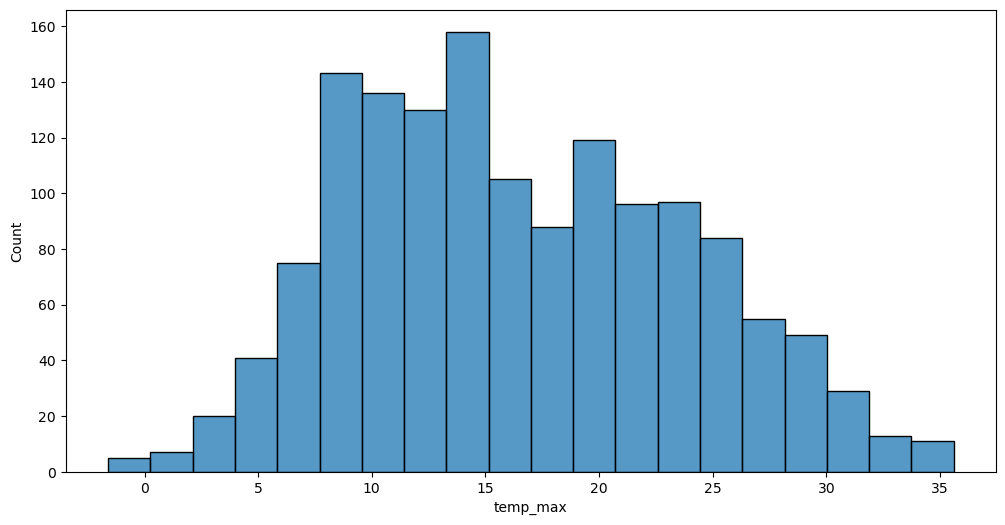

In [13]:
plt.figure(figsize = (12,6))
sns.histplot(data = df, x = df.temp_max, bins = 20)

<Axes: xlabel='temp_min', ylabel='Count'>

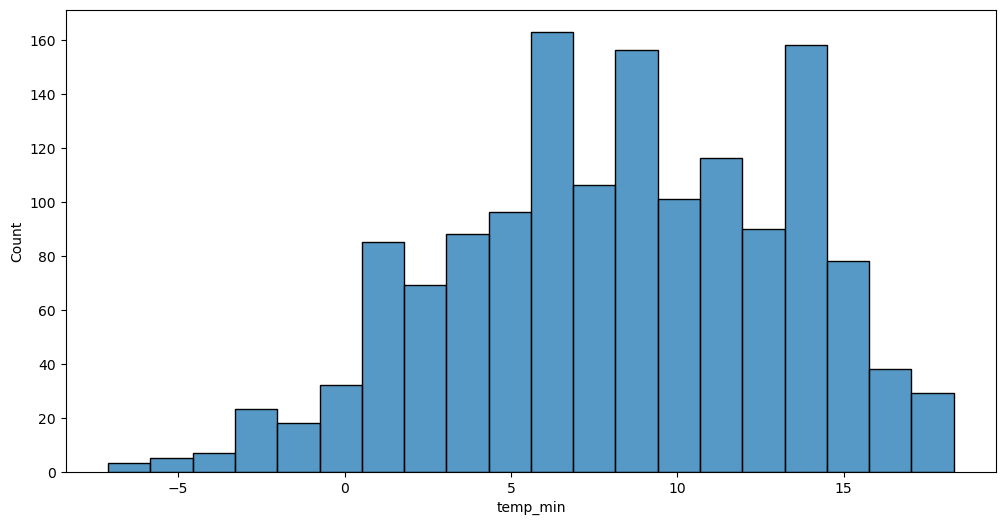

In [14]:
plt.figure(figsize = (12,6))
sns.histplot(data = df, x = df.temp_min, bins = 20)

In [15]:
df.loc[:,['date','temp_max']]
df['date'] = pd.to_datetime(df['date'])

## Max temperature in each month in each year

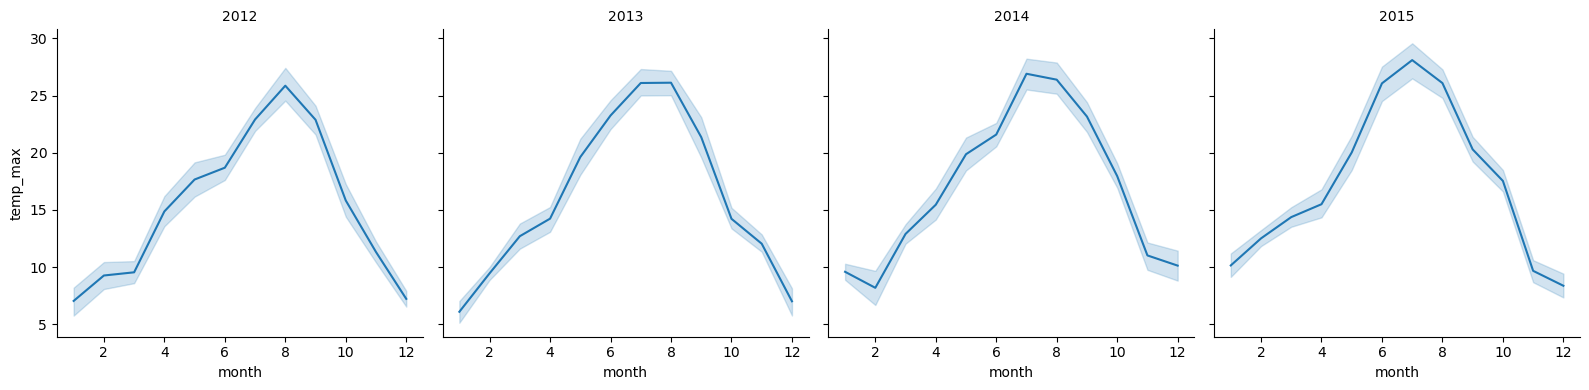

In [17]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max')
g.set_axis_labels('month', 'temp_max')
g.set_titles(col_template="{col_name}")  # Corrected line
plt.show()


## Min temperature in each month in each year

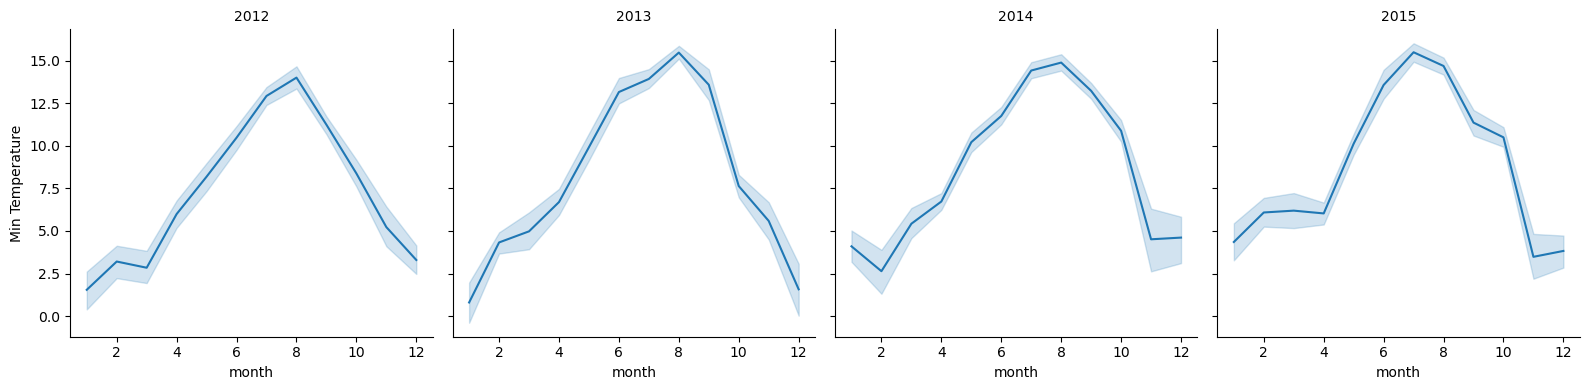

In [18]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min')
g.set_axis_labels('month', 'Min Temperature')
g.set_titles(col_template="{col_name}")  # Corrected line
plt.show()

## Prediction in each month in each year

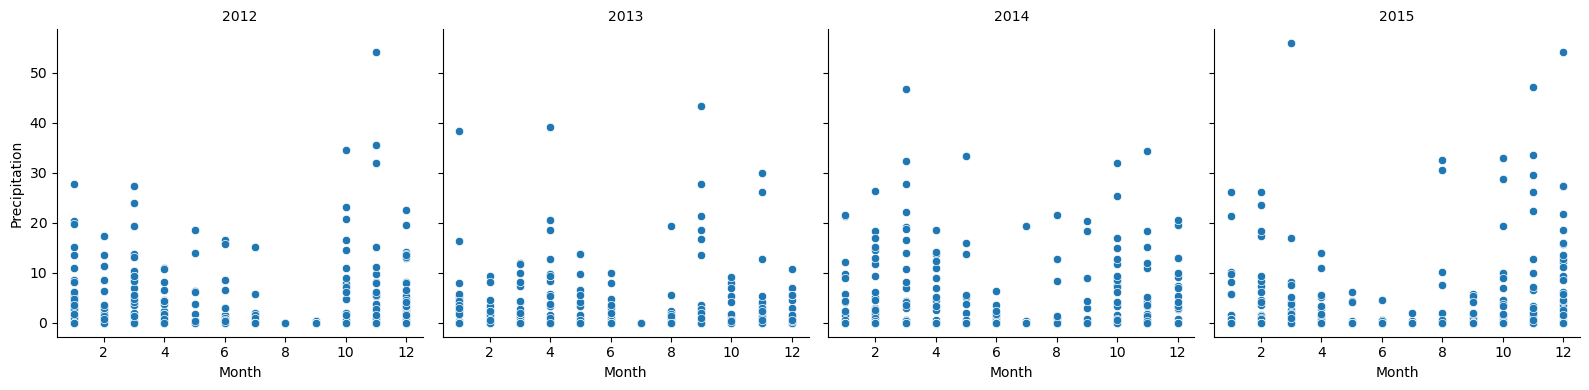

In [22]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

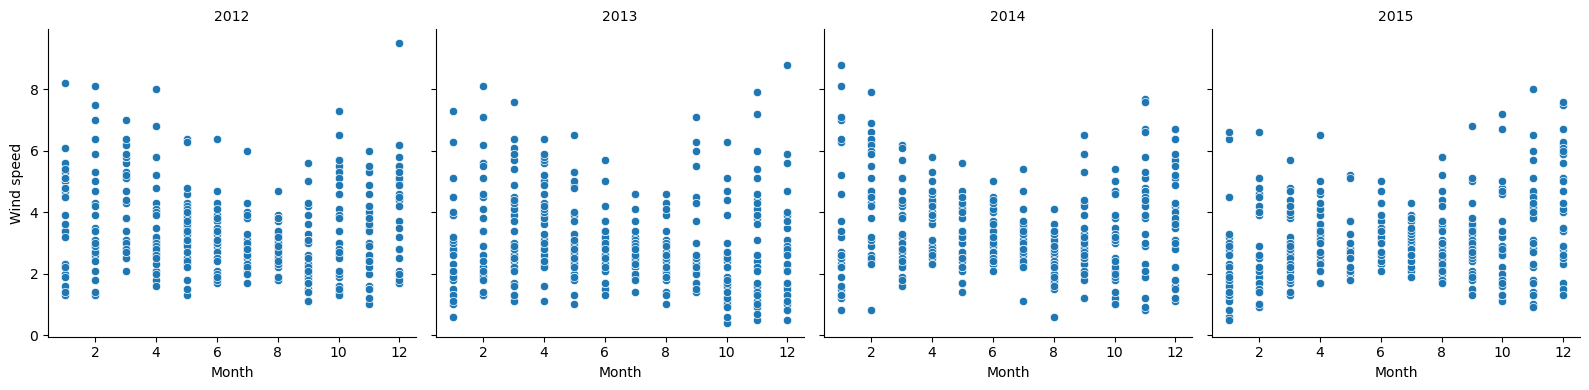

In [23]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

In [24]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

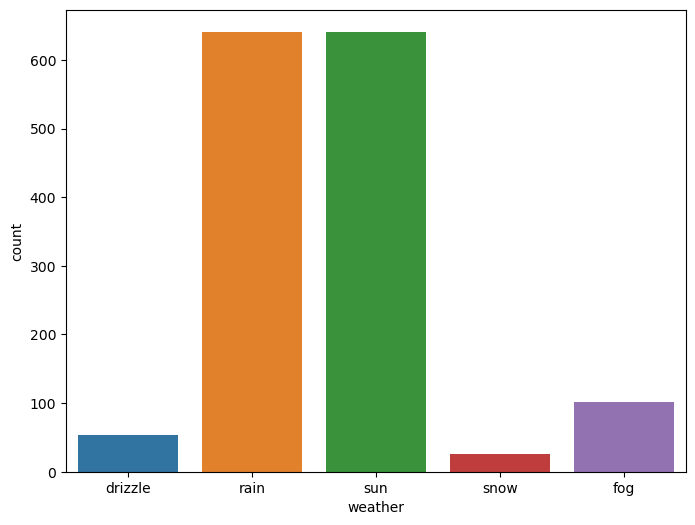

In [25]:
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = df.weather)

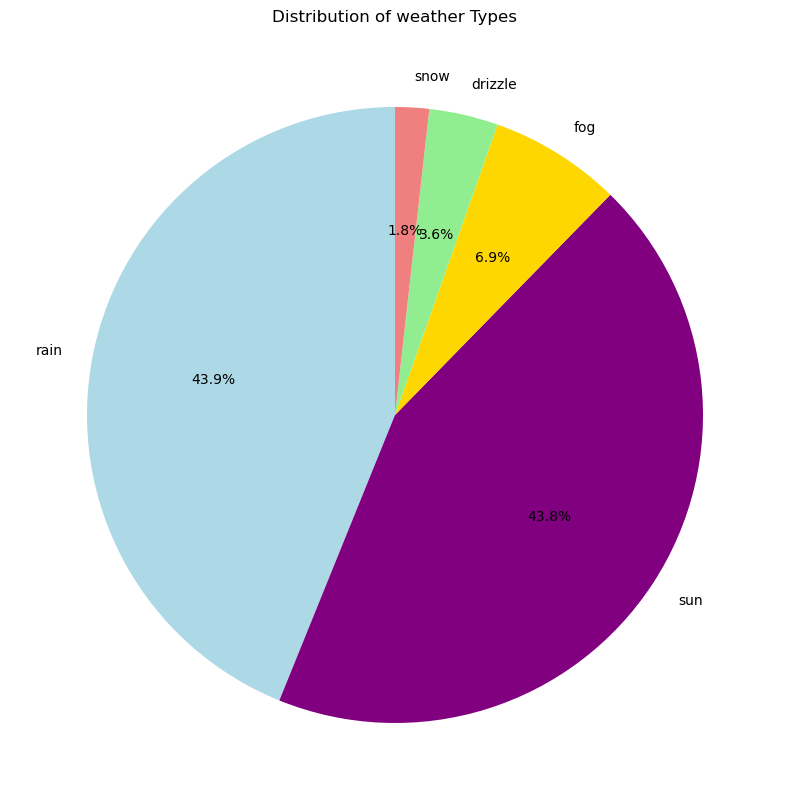

In [26]:
x= df.weather.value_counts()
plt.figure(figsize = (12,10))
plt.pie(x, labels = x.index, autopct = '%1.1f%%', startangle = 90, colors=['lightblue','purple','gold','lightgreen', 'lightcoral'])
plt.title('Distribution of weather Types')
plt.show()

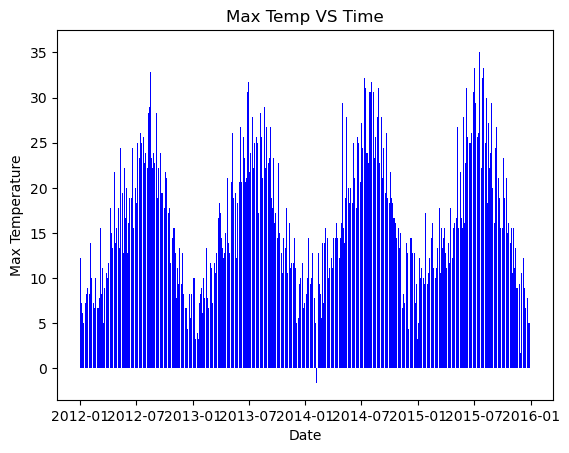

In [54]:
df1 = pd.DataFrame(df)
df1['date'] = pd.to_datetime(df1['date'])
plt.bar(df['date'], df['temp_max'], color = 'Blue')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.title('Max Temp VS Time')
plt.show()


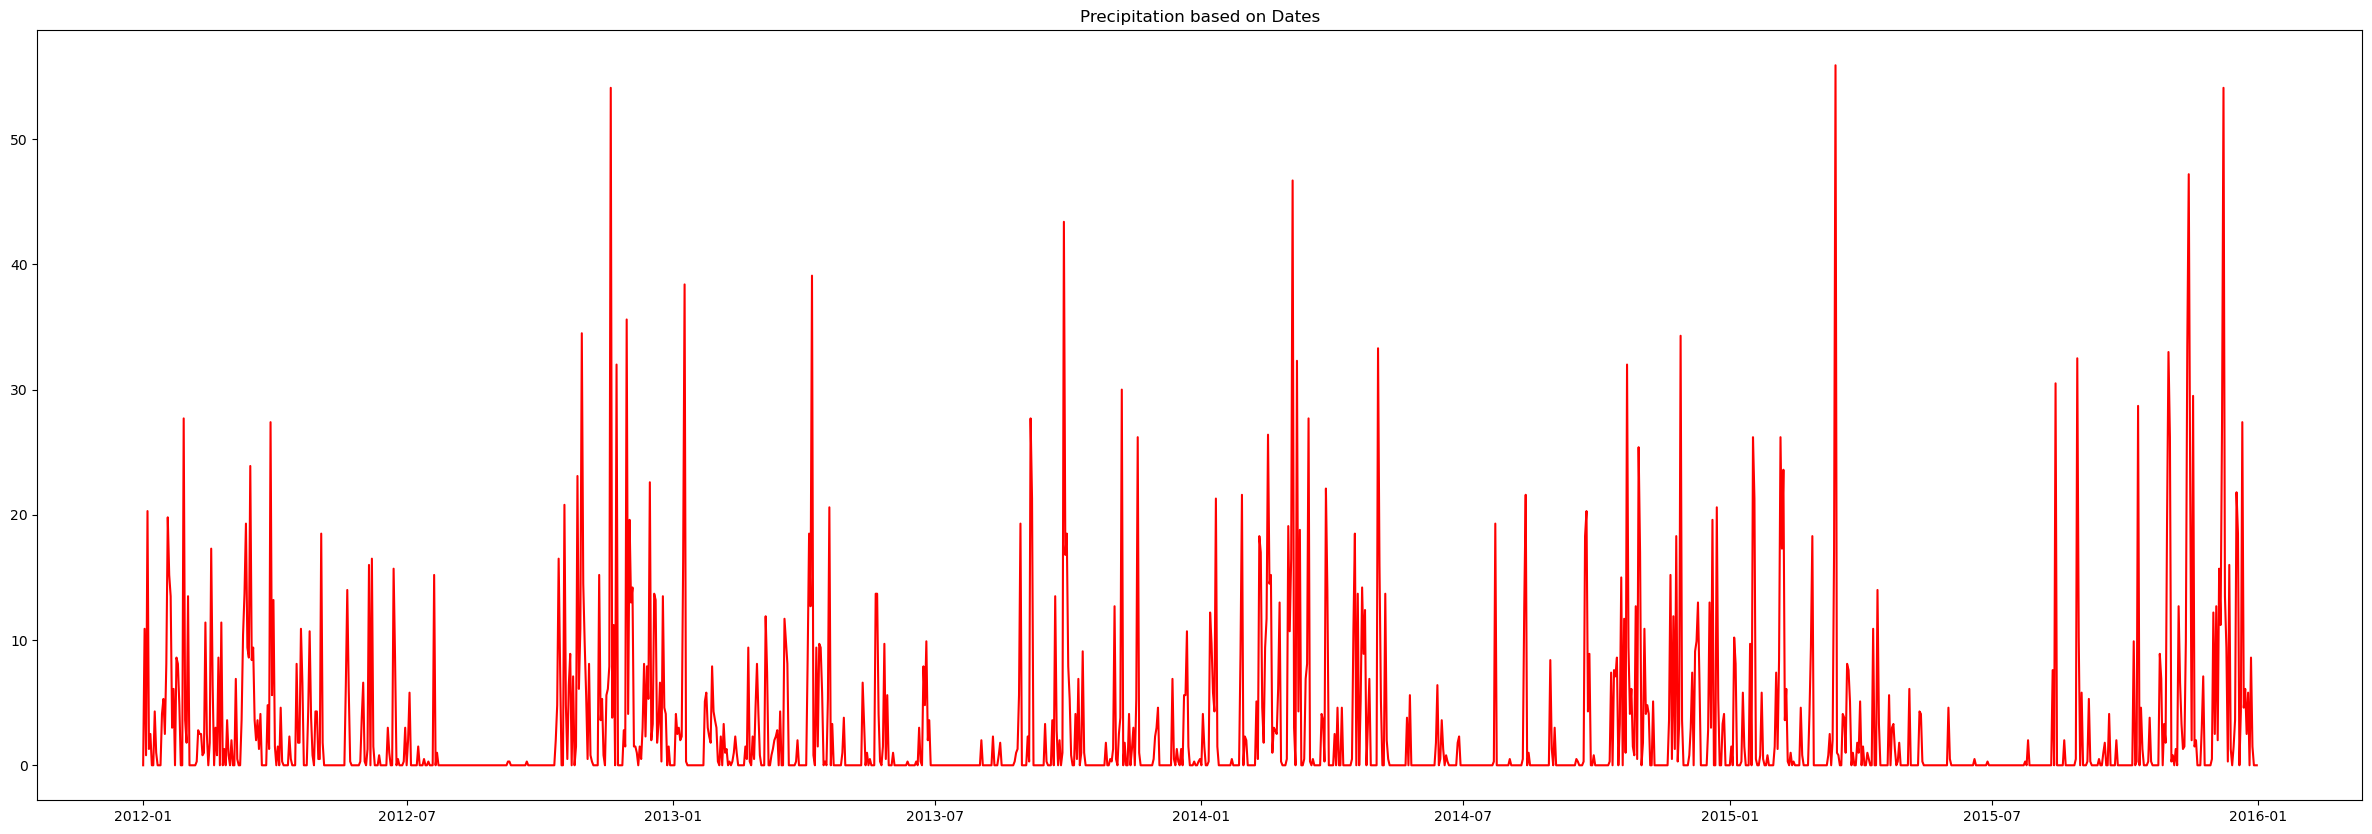

In [55]:
x = df['date']
y = df['precipitation']
plt.figure(figsize = (30,10))
plt.plot(x,y, 'r')
plt.title('Precipitation based on Dates')
plt.show()

Text(0.5, 1.0, 'Date VS Wind')

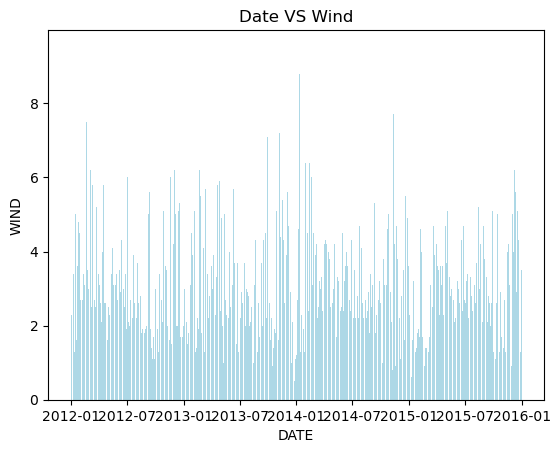

In [58]:
df1 = pd.DataFrame(df)
df1['wind'].value_counts()
plt.bar(df1['date'], df1['wind'], color='lightblue')
plt.xlabel('DATE')
plt.ylabel('WIND')
plt.title('Date VS Wind')

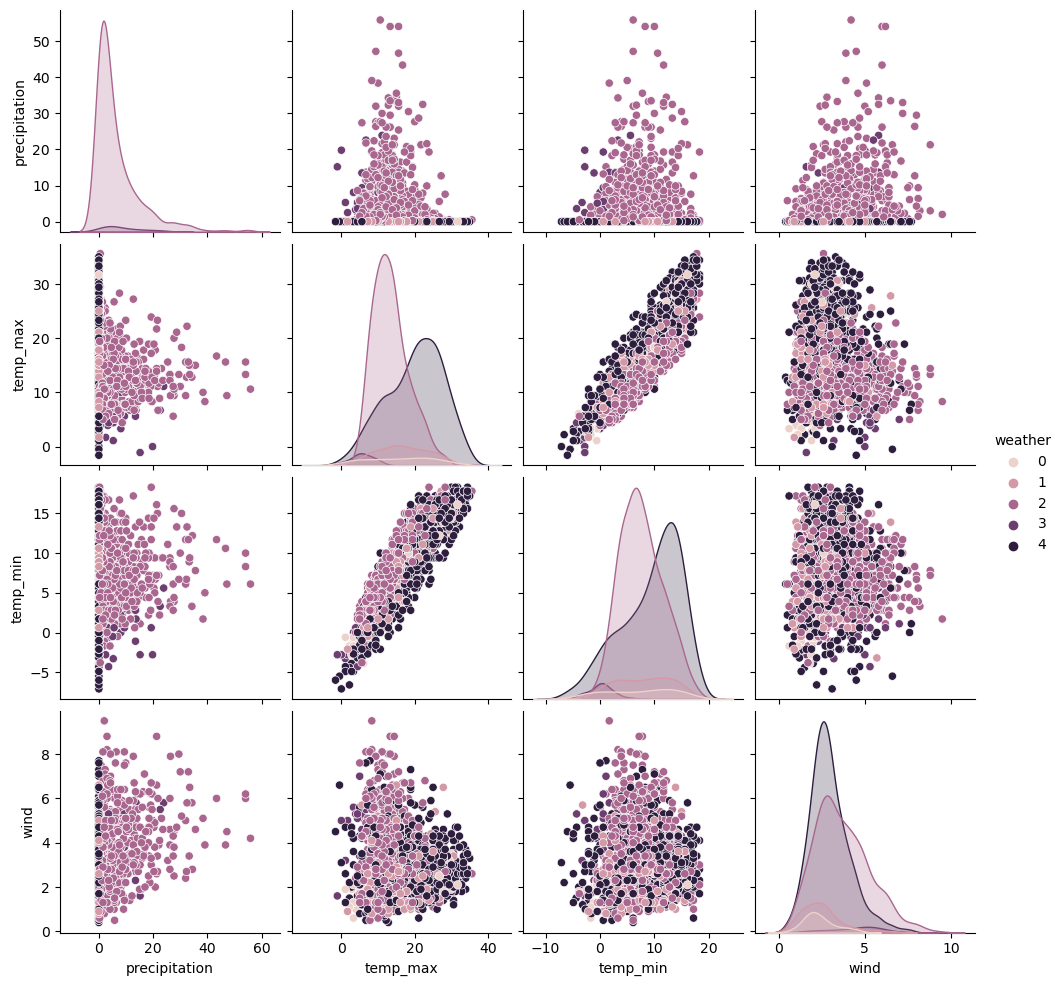

In [62]:
sns.pairplot(data=df, hue='weather')

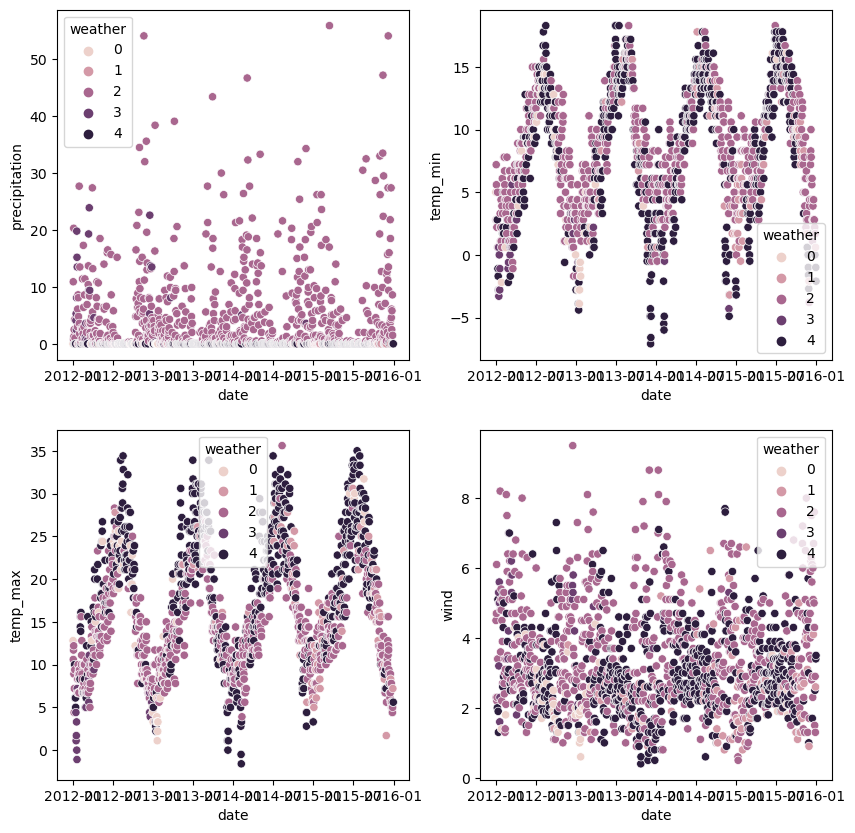

In [63]:
fig,axes = plt.subplots(2,2, figsize=(10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.scatterplot(data = df, x = 'date', y = cols[i], hue = 'weather', ax = axes[i%2,i//2])

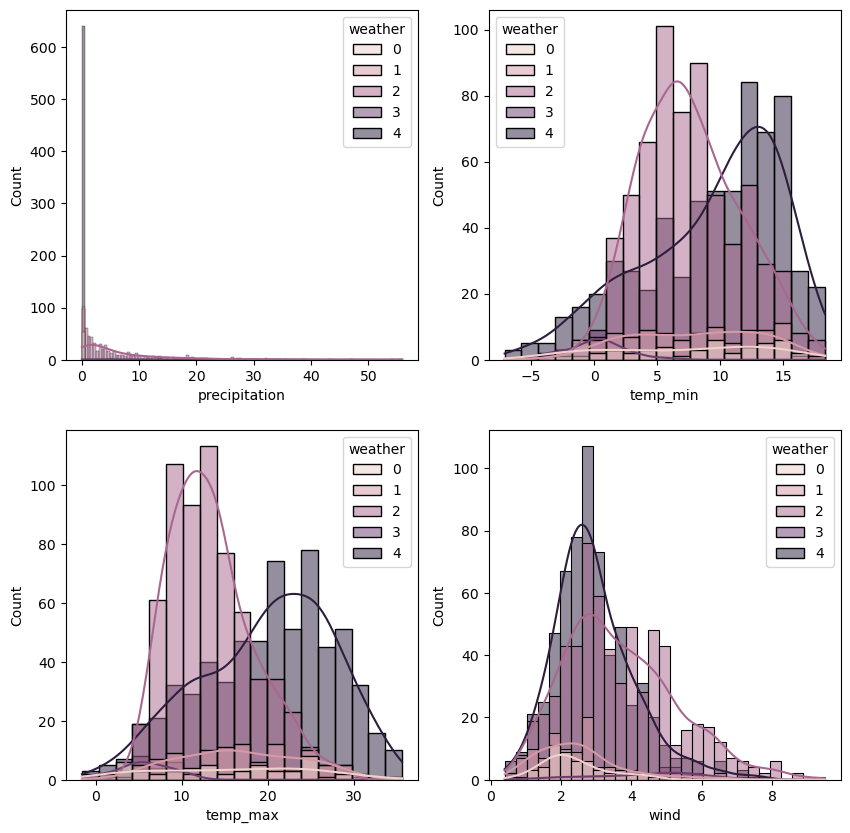

In [64]:
fig.clear()
fig,axes = plt.subplots(2,2, figsize=(10,10))
for i in range(4):
    sns.histplot(kde = True, data = df, x = cols[i], hue = 'weather', ax = axes[i%2,i//2])

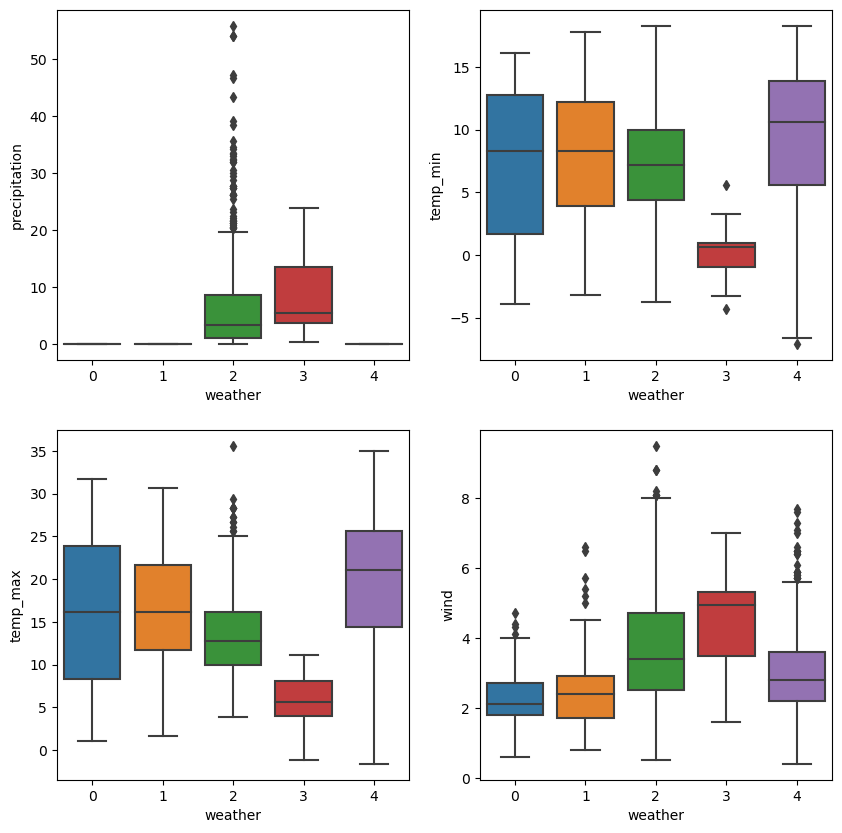

In [66]:
fig,axes = plt.subplots(2,2, figsize = (10,10))
cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
for i in range(4):
    sns.boxplot(x = 'weather', y = cols[i], data = df, ax = axes[i%2,i//2])

In [27]:
df.drop('month', axis = 1, inplace = True)
df.drop('year', axis = 1, inplace = True)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [32]:
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y = df['weather']
X_train, X_test,y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division = 1)

print(f"accuracy: {accuracy:.2f}")

accuracy: 0.83


In [34]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]


In [36]:
print("Classification Report :")
print(classification_rep)

Classification Report :
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.47       293
weighted avg       0.84      0.83      0.78       293



In [70]:
import scipy
import re
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(KNN.score(X_test,y_test)*100))

KNN Accuracy:78.16%


In [75]:
SVM = SVC()
SVM.fit(X_train,y_train)
print("SVM Accuracy:{:.2f}%".format(SVM.score(X_test,y_test)*100))

SVM Accuracy:76.45%


In [76]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(GBC.score(X_test,y_test)*100))

Gradient Boosting Accuracy:81.57%


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression()
rf = RandomForestClassifier(bootstrap=False)
gbc = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
svc = SVC()
knn= KNeighborsClassifier()

In [79]:
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
gbc.fit(X_train,y_train)
dt.fit(X_train,y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbc = gbc.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_knn = knn.predict(X_test)


print('LogReg Accuracy = {:.2f}'.format(lr.score(X_test,y_test)*100))
print('RandFor Accuracy = {:.2f}'.format(rf.score(X_test,y_test)*100))
print('GBC Accuracy = {:.2f}'.format(gbc.score(X_test,y_test)*100))
print('DT Accuracy = {:.2f}'.format(dt.score(X_test,y_test)*100))
print('SVC Accuracy = {:.2f}'.format(svc.score(X_test,y_test)*100))
print('KNN Accuracy = {:.2f}'.format(knn.score(X_test,y_test)*100))

C:\Users\syeda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogReg Accuracy = 83.28
RandFor Accuracy = 79.18
GBC Accuracy = 81.57
DT Accuracy = 74.06
SVC Accuracy = 76.45
KNN Accuracy = 78.16


## Conclusion

In this the weather is being predicted by using Machine Learning algorithms.